In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import matplotlib as plot
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

In [24]:
df = pd.read_csv("/content/drive/MyDrive/globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [26]:
df.shape

(181691, 135)

In [27]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### describe the DB

In [29]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr   alternative  \
count  181691.000000  181691.000000  181690.000000  29011.000000   
mean        0.993093       0.875668      -0.523171      1.292923   
std         0.082823       0.329961       2.455819      0.703729   
min         0.000000       0.000000      -9.000000      1.000000   
25%         1.000000       1.000000       0.000000      1.000000   
50%         1.000000       1.000000       0.000000      1.000000   
75%         1.000000       1.000000       0.000000      1.000000   
max         1.000000       1.000000       1.000000      5.000000   

            multiple        success        suicide    attacktype1  \
count  181690.000000  181691.000000  181691.000000  181691.000000   
mean        0.137773       0.889598       0.036507       3.247547   
std         0.344663       0.313391       0.187549       1.915772   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       1.000000       0.000000       2.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         0.000000       1.000000       0.000000       3.000000   
max         1.000000       1.000000       1.000000       9.000000   

       attacktype2  attacktype3      targtype1   targsubtype1        natlty1  \
count  6314.000000   428.000000  181691.000000  171318.000000  180132.000000   
mean      3.719512     5.245327       8.439719      46.971474     127.686441   
std       2.272023     2.246642       6.653838      30.953357      89.299120   
min       1.000000     1.000000       1.000000       1.000000       4.000000   
25%       2.000000     2.000000       3.000000      22.000000      83.000000   
50%       2.000000     7.000000       4.000000      35.000000     101.000000   
75%       7.000000     7.000000      14.000000      74.000000     173.000000   
max       9.000000     8.000000      22.000000     113.000000    1004.000000   

          targtype2  targsubtype2       natlty2    targtype3  targsubtype3  \
count  11144.000000  10685.000000  10828.000000  1176.000000   1097.000000   
mean      10.247218     55.311652    131.179442    1

### With help of normal operation all column value is not visble so use pandas.set_option library to show all data 

In [30]:
pd.set_option('display.max_columns',None)
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [31]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Data Type in globalterroris DB

In [32]:
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

### Null Value in globalterroris DB

In [33]:
#null values and its count
df.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

### Sum of Null Value in globalterroris DB

In [34]:
#sum of all null values 
df.isna().sum().sum()

13853997

## Check Missing Values

In [35]:
#Check Missing Values
def check_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

check_missing(df)

Total   Percent
gsubname3         181671  0.999890
weapsubtype4_txt  181621  0.999615
weapsubtype4      181621  0.999615
weaptype4         181618  0.999598
weaptype4_txt     181618  0.999598
claimmode3        181558  0.999268
claimmode3_txt    181558  0.999268
gsubname2         181531  0.999119
claim3            181373  0.998250
guncertain3       181371  0.998239
gname3            181367  0.998217
divert            181367  0.998217
attacktype3       181263  0.997644
attacktype3_txt   181263  0.997644
ransomnote        181177  0.997171
ransompaidus      181139  0.996962
ransomamtus       181128  0.996901
claimmode2        181075  0.996610
claimmode2_txt    181075  0.996610
ransompaid        180917  0.995740

## Data Cleaning
### in the bellow statement we fix 50% for null value if data is more the 50% we are not going to consider for over analysis


In [36]:
# removing rows with >50% null values
# using thres to drop >50% nulls

thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)

### Checking 

In [37]:
df.isnull().sum()/len(df) *100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

### filtering the features in globalterroris DB 

In [38]:
data= df

In [39]:
data.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
gname                object
guncertain1         float64
individual          

In [41]:
data.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity       vicinity          crit1  \
count  1.771340e+05  181685.000000  181691.000000  181691.000000   
mean  -4.586957e+02       1.451452       0.068297       0.988530   
std    2.047790e+05       0.995430       0.284553       0.106483   
min   -8.618590e+07       1.000000      -9.000000       0.000000   
25%    4.545640e+00       1.000000       0.000000       1.000000   
50%    4.324651e+01       1.000000       0.000000       1.000000   
75%    6.871033e+01       1.000000       0.000000       1.000000   
max    1.793667e+02       5.000000       1.000000       1.000000   

               crit2          crit3      doubtterr       multiple  \
count  181691.000000  181691.000000  181690.000000  181690.000000   
mean        0.993093       0.875668      -0.523171       0.137773   
std         0.082823       0.329961       2.455819       0.344663   
min         0.000000       0.000000      -9.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             success        suicide    attacktype1      targtype1  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean        0.889598       0.036507       3.247547       8.439719   
std         0.313391       0.187549       1.915772       6.653838   
min         0.000000       0.000000       1.000000       1.000000   
25%         1.000000       0.000000       2.000000       3.000000   
50%         1.000000       0.000000       3.000000       4.000000   
75%         1.000000       0.000000       3.000000      14.000000   
max         1.000000       1.000000       9.000000      22.000000   

        targsubtype1        natlty1    guncertain1     individual  \
count  171318.000000  180132.000000  181311.000000  181691.000000   
mean       46.971474     127.686441       0.081440       0.002950   
std        30.953357      89.299120       0.273511       0.054234   
min         1.000000       4.000000       0.000000       0.000000   
25%        22.000000      83.000000       0.000000       0.000000   
50%        35.000000     101.000000       0.000000       0.000000   
75%        74.000000     173.000000       0.000000       0.000000   
max       113.000000    1004.000000       1.000000       1.000000   

              nperps       nperpcap        claimed      weaptype1  \
count  110576.000000  112202.000000  115571.000000  181691.000000   
mean      -65.361154      -1.517727       0.049666       6.447325   
std       216.536633      12.830346       1.093195       2.173435   
min       -99.000000  

### Filling the NA value in columns which has number in data

In [42]:
int_cols=data.select_dtypes(include=np.number).columns.tolist()

In [44]:
# Filling data with respective medians and modes
for i in int_cols:
    data[i] = data[i].fillna(data[i].median())

data.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1                 0
natlty1_txt          1559
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     



*   Fill NA value for data which has number




### columns which has string data type
### checking whether I can input mode to this data in string data type

In [45]:
string_cols=data.select_dtypes(include=object).columns.tolist()
string_cols

['country_txt',
 'region_txt',
 'provstate',
 'city',
 'summary',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weapdetail',
 'scite1',
 'dbsource']

### describe the data to fill the data for string data type

In [46]:
for i in string_cols:
  print(data[i].describe())   # checking whether I can input mode to this data
  print('--------------------')

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object
--------------------
count                         181691
unique                            12
top       Middle East & North Africa
freq                           50474
Name: region_txt, dtype: object
--------------------
count      181270
unique       2855
top       Baghdad
freq         7645
Name: provstate, dtype: object
--------------------
count      181257
unique      36674
top       Unknown
freq         9775
Name: city, dtype: object
--------------------
count                                                115562
unique                                               112492
top       09/00/2016: Sometime between September 18, 201...
freq                                                    100
Name: summary, dtype: object
--------------------
count                181691
unique                    9
top       Bombing/Explosion
freq                  88255
Name: attacktype1_txt, dtype: ob

### fill the data with help of MOde()

In [47]:
for i in ['provstate','city','target1','natlty1_txt']:
  data[i]=data[i].fillna(data[i].mode()[0])  # cause its string

In [48]:
for i in string_cols:
  print(data[i].describe())   # checking whether I can input mode to this data
  print('--------------------')

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object
--------------------
count                         181691
unique                            12
top       Middle East & North Africa
freq                           50474
Name: region_txt, dtype: object
--------------------
count      181691
unique       2855
top       Baghdad
freq         8066
Name: provstate, dtype: object
--------------------
count      181691
unique      36674
top       Unknown
freq        10209
Name: city, dtype: object
--------------------
count                                                115562
unique                                               112492
top       09/00/2016: Sometime between September 18, 201...
freq                                                    100
Name: summary, dtype: object
--------------------
count                181691
unique                    9
top       Bombing/Explosion
freq                  88255
Name: attacktype1_txt, dtype: ob

## taking required columns for my analysis

In [49]:
data=data[['iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid','dbsource']] # taking required columns for my analysis


Year -> This field contains the year in which the incident occurred.

Month -> This field contains the number of the month in which the incident occurred.

Day -> This field contains the numeric day of the month on which the incident occurred.

Extended -> 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less

Country -> This field identifies the country or location where the incident occurred.

Region -> This field identifies the region in which the incident occurred.

City -> Name of the city, village, or town in which the incident occurred

Success -> Success of a terrorist strike

Suicide -> 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide

Attack_Type -> The general method of attack and broad class of tactics used.

Target_Type -> The general type of target/victim

Target_Sub_Type -> The more specific target category

Attack_Group -> The name of the group that carried out the attack

Weapon -> General type of weapon used in the incident

Number_of_Killed -> The number of total confirmed fatalities for the incident

State -> state where attacked

News_source -> source of new where the data is collected 

## Rename the column

In [50]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country_name','provstate':'State',
                   'region_txt':'Region_name','city':'City','success':'Success','suicide':'Suicide','dbsource':'News_source',
                   'attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Destructive Features

In [52]:
print('Country with most attacks: ',data['Country_name'].value_counts().idxmax())
print('City with most attacks: ',data['City'].value_counts().index[1])
print("Region with the most attacks:",data['Region_name'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Attack_Group'].value_counts().index[1])
print("Most Attack Types:",data['Attack_Type'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Visualizing the Data:

### Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other 

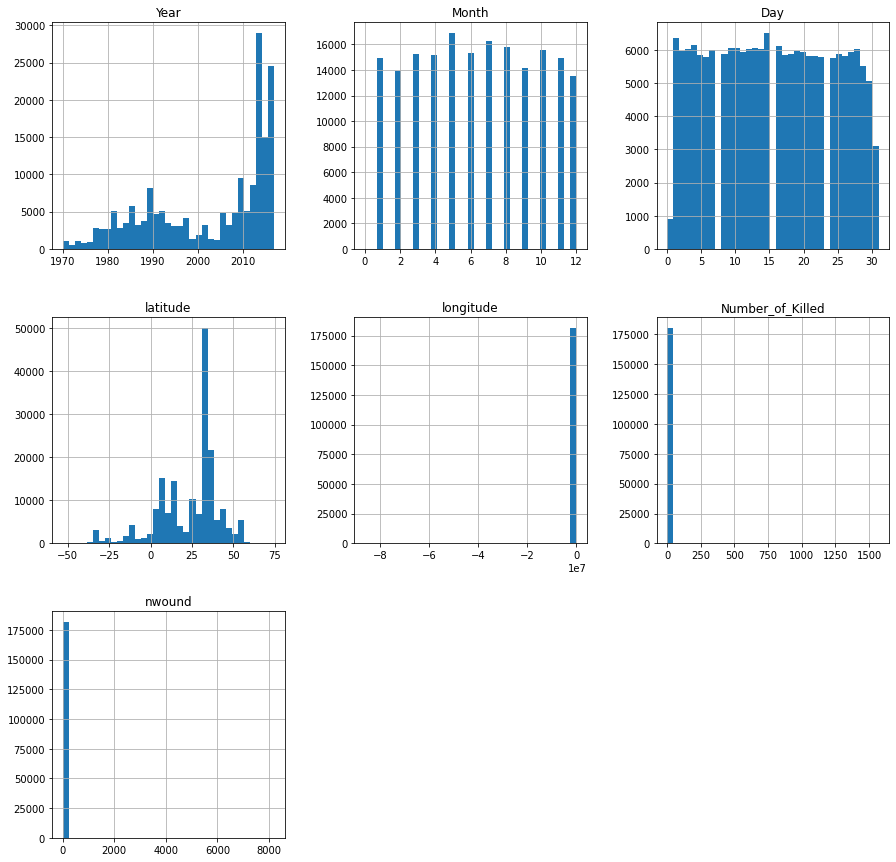

In [54]:
data1 = data[['Year','Month','Day','latitude','longitude','Number_of_Killed','nwound']]
data1.hist(bins=35, figsize=(15,15))
plt.show()

# correlation in data

In [55]:
data1.corr()

Year     Month       Day  latitude  longitude  \
Year              1.000000  0.000139  0.018254  0.155107   0.003803   
Month             0.000139  1.000000  0.005497 -0.015916  -0.003832   
Day               0.018254  0.005497  1.000000  0.002781  -0.002258   
latitude          0.155107 -0.015916  0.002781  1.000000   0.001486   
longitude         0.003803 -0.003832 -0.002258  0.001486   1.000000   
Number_of_Killed  0.021252  0.004031 -0.003225 -0.011567  -0.000569   
nwound            0.017484  0.003178 -0.001082  0.015512   0.000202   

                  Number_of_Killed    nwound  
Year                      0.021252  0.017484  
Month                     0.004031  0.003178  
Day                      -0.003225 -0.001082  
latitude                 -0.011567  0.015512  
longitude                -0.000569  0.000202  
Number_of_Killed          1.000000  0.443326  
nwound                    0.443326  1.000000

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

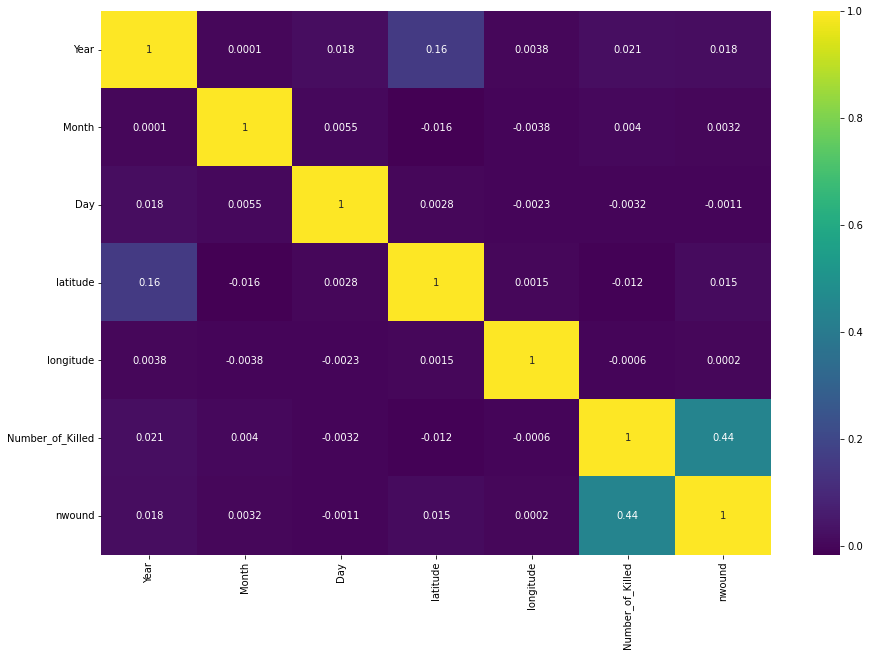

In [56]:
#Correlation Analysis
plt.figure(figsize=(15,10))

sns.heatmap(np.round(data1.corr(),4), annot=True, cmap = 'viridis')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

## Terrorist Activity Each year

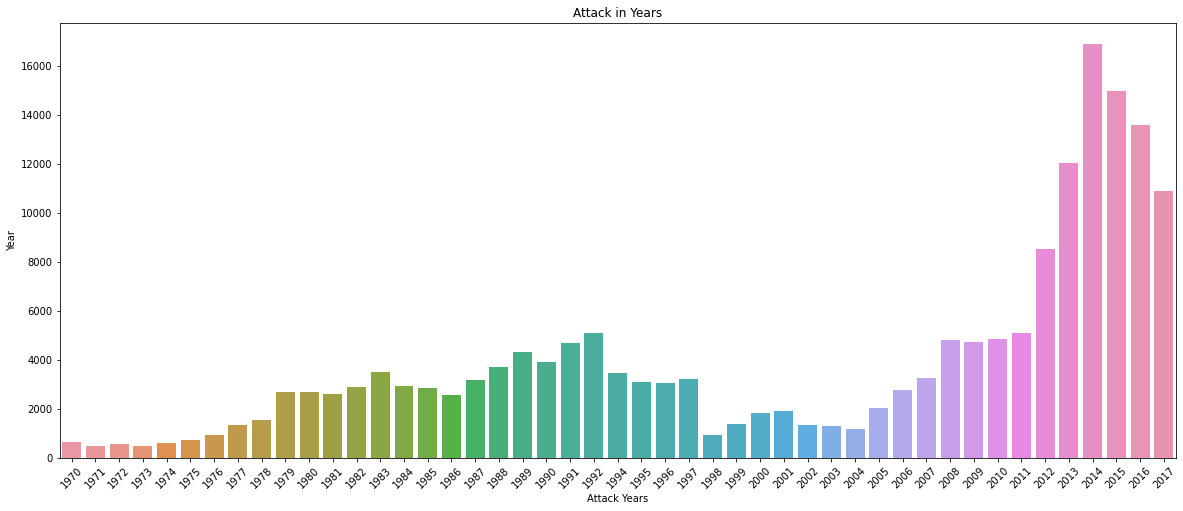

In [57]:
x = data['Year'].unique()
y = data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(20,8))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=45)
sns.barplot(x=x, y=y)
plt.show()



*   More number of attacks in 2014




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Month wise attacks')

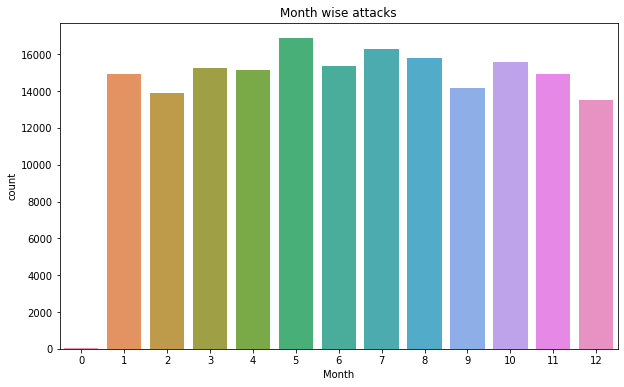

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(data['Month']).set_title('Month wise attacks')



*   More number of attacks in 5 month




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


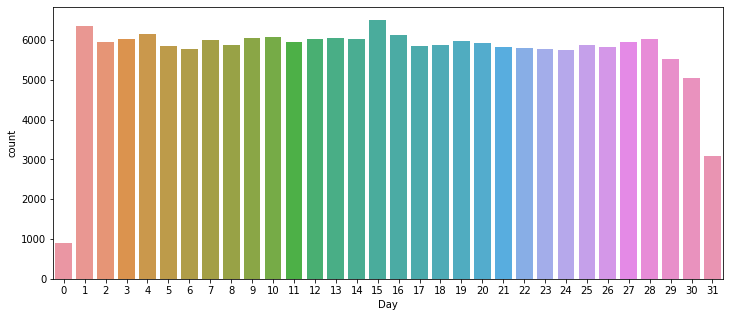

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(data['Day'])



*   More number of attacks is in 1 and 15 day
*   what is day 0??



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


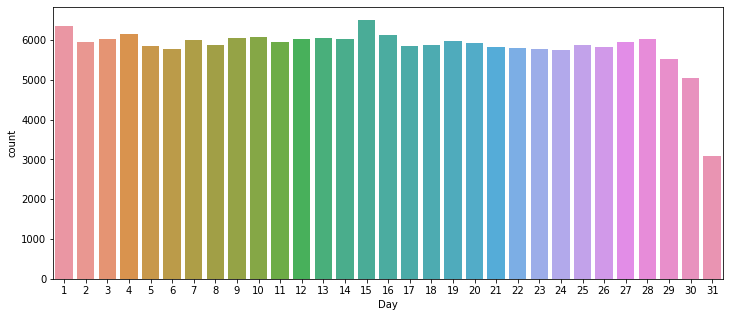

In [60]:
data.drop(data[data['Day']==0].index,axis=0,inplace=True) # dropping
plt.figure(figsize=(12,5))
sns.countplot(data['Day'])

## Terrorist Activity By Region in Each Year

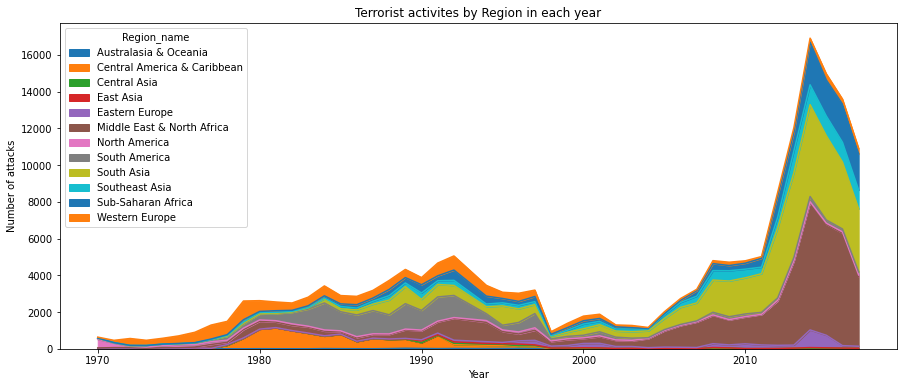

In [61]:
#Area plot
pd.crosstab(data.Year,data.Region_name).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

##  Killed vs Region

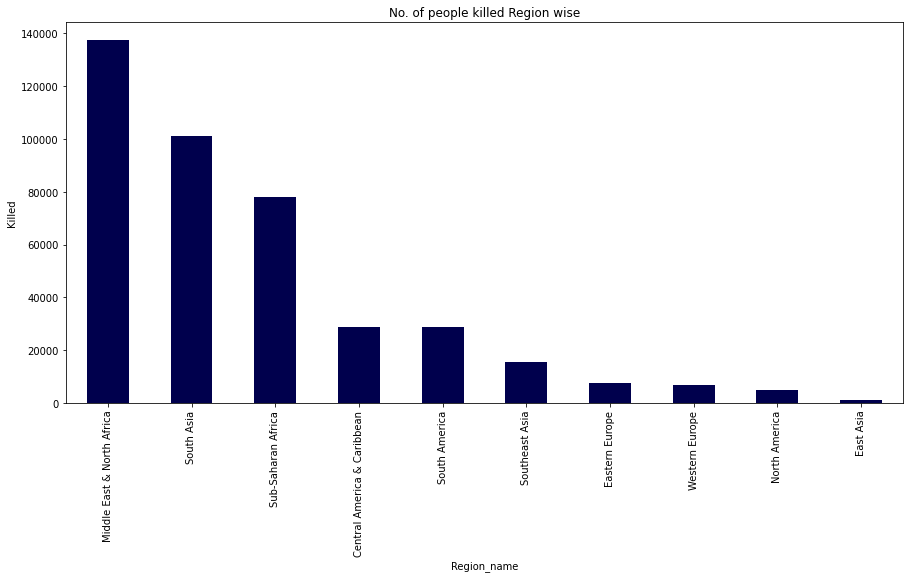

In [64]:
plt.figure(figsize = (15,7))
data.groupby(['Region_name'])['Number_of_Killed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'seismic')
plt.xticks(rotation=90)
plt.title('No. of people killed Region wise')
plt.ylabel("Killed")
plt.show()

## Top Countries Affiliated by Terrorist Attacks

In [62]:
country_wise=data['Country_name'].value_counts().reset_index()
country_wise.rename(columns={"index":'Country Name','Country_name':'Count'},inplace=True)
country_wise.head(20)

Country Name  Count
0             Iraq  24616
1         Pakistan  14331
2      Afghanistan  12718
3            India  11931
4         Colombia   8232
5      Philippines   6874
6             Peru   6059
7      El Salvador   5277
8   United Kingdom   5208
9           Turkey   4267
10         Somalia   4124
11         Nigeria   3907
12        Thailand   3840
13           Yemen   3345
14           Spain   3212
15       Sri Lanka   2995
16   United States   2803
17         Algeria   2712
18          France   2620
19           Egypt   2478

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


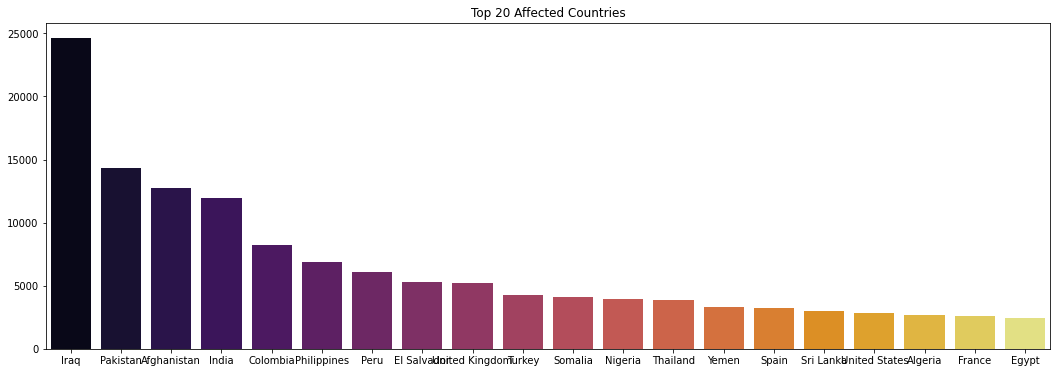

In [63]:
plt.subplots(figsize=(18,6))
sns.barplot(data['Country_name'].value_counts()[:20].index, data['Country_name'].value_counts()[:20].values, palette='inferno')
plt.title('Top 20 Affected Countries')
plt.show()

## Top Cities Affected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


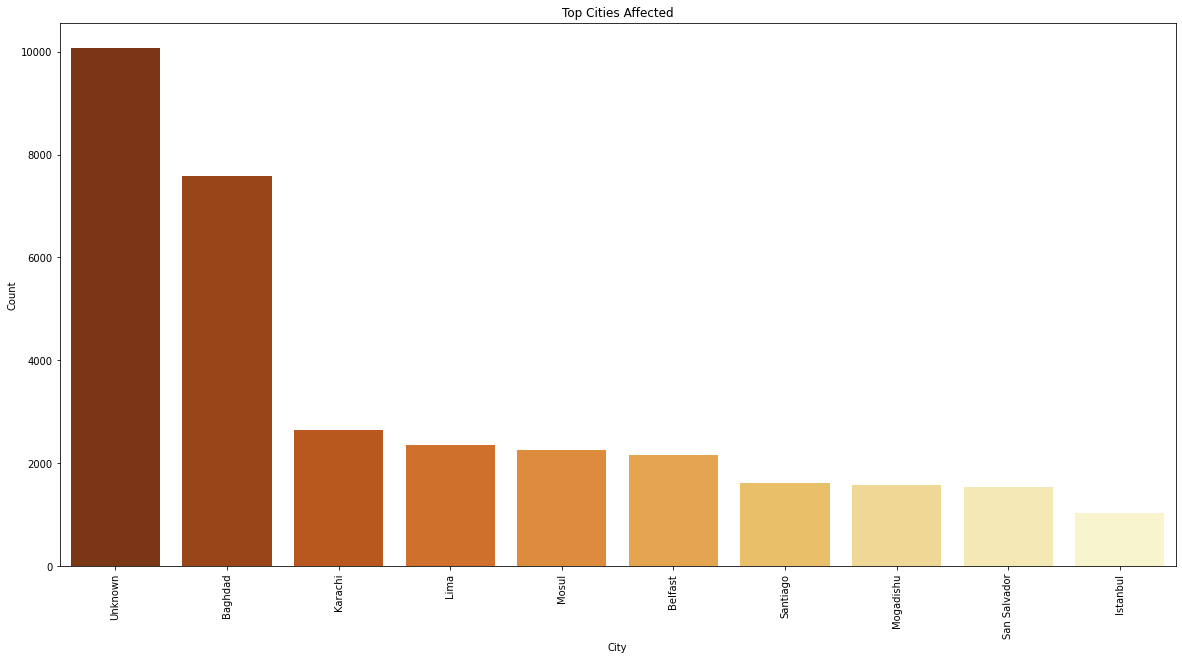

In [65]:
plt.subplots(figsize=(20,10))
sns.barplot(data['City'].value_counts()[:10].index,data['City'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Cities Affected')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Terrorist attacks of a particular year and their Location
### lets look at the terrorist acts in the world over a certain year.

In [66]:
filter = data['Year'] == 2001
filter_year = data[filter] # filter data where year is 2001
filter_year

Year  Month  Day  Extended  country                      Country_name  \
71651  2001      1    1         0      228                             Yemen   
71652  2001      1    1         1       45                          Colombia   
71653  2001      1    1         0      209                            Turkey   
71654  2001      1    1         0        6                           Algeria   
71655  2001      1    2         0      228                             Yemen   
71656  2001      1    2         0      235                        Yugoslavia   
71657  2001      1    2         0      217                     United States   
71658  2001      1    3         0      209                            Turkey   
71659  2001      1    3         0      199                       Switzerland   
71660  2001      1    3         0       92                             India   
71661  2001      1    3         0       45                          Colombia   
71662  2001      1    3         0        6                           Algeria   
71663  2001      1    5         0       34                           Burundi   
71664  2001      1    5         0       92                             India   
71665  2001      1    5         0       92                             India   
71666  2001      1    5         0      167                            Russia   
71667  2001      1    5         0       45                          Colombia   
71668  2001      1    5         0      603                    United Kingdom   
71669  2001      1    4         0      167                            Russia   
71670  2001      1    5         0      603                    United Kingdom   
71671  2001      1    6         0       45                          Colombia   
71672  2001      1    6         0       45                          Colombia   
71673  2001      1    6         0      167                            Russia   
71674  2001      1    6         0      167                            Russia   
71675  2001      1    6         0      182                           Somalia   
71676  2001      1   17         0       45                          Colombia   
71677  2001      1    7         0       99                       Ivory Coast   
71678  2001      1    7         0      209                            Turkey   
71679  2001      1    7         0       92                             India   
71680  2001      1    7         0       92                             India   
71681  2001      1    7         0        6                           Algeria   
71682  2001      1    7         1        4                       Afghanistan   
71683  2001      1    7         0        6                           Algeria   
71684  2001      1    7         0       92                             India   
71685  2001      1    8         0       97                            Israel   
71686  2001      1    8         0      209                            Turkey   
71687  2001      1    8         0      167                            Russia   
71688  2001      1    8         0      167                            Russia   
71689  2001      1    7         0       92                             India   
71690  2001      1    9         1      167                            Russia   
71691  2001      1    9         0       92                             India   
71692  2001      1    9         0       92                             India   
71694  2001      1    9         0      185                             Spain   
71695  2001      1    9         1       45                          Colombia   
71696  2001      1    9         0       45                          Colombia   
71697  2001      1    9         0       45                          Colombia   
71698  2001      1   10         0      603                    United Kingdom   
71699  2001      1   10         1      160                       Philippines   
71700  2001      1   10         0       45                          Colombia   
71701  

Country Vs longitude

In [67]:
reqFields = filter_year.loc[:,"City":"longitude"]
reqFields = reqFields.dropna()
reqFieldsLst = reqFields.values.tolist()
reqFieldsLst

[['Aden', 12.825647, 44.846416],
 ['Bogota district', 4.5981, -74.07603],
 ['Istanbul', 41.106178, 28.689863],
 ['Djelfa', 34.666667, 3.25],
 ['Aden', 12.825647, 44.846416],
 ['Vranje', 42.55, 21.9],
 ['Glendale', 42.738006, -123.417103],
 ['Istanbul', 41.106178, 28.689863],
 ['Zurich', 47.36865, 8.539182],
 ['Keshpur', 22.556913, 87.461815],
 ['Yolombo', 6.598449, -75.011559],
 ['Laghouat', 33.80658, 2.878025],
 ['Bujumbura', -3.375828, 29.364107],
 ['Poonch', 33.767001, 74.092404],
 ['Srinagar', 34.08374, 74.789902],
 ['Argun', 43.3, 45.866667],
 ['Guatape', 6.23384, -75.1617],
 ['Ripon', 53.99212, -1.541812],
 ['Bachi-Yurt', 43.219708, 46.199835],
 ['Patrington', 53.683498, -0.013153],
 ['Unknown', 6.547306, -71.002231],
 ['Barrancabermeja', 7.060051, -73.853115],
 ['Urus-Martan', 43.127544, 45.539974],
 ['Grozny', 43.320229, 45.654491],
 ['Tayeeglow', 4.010857, 44.513226],
 ['Chengue', 9.614635, -75.398636],
 ['Abidjan', 5.316667, -4.033333],
 ['Istanbul', 41.106178, 28.689863],
 [

## Plot on Map

In [68]:
import folium
from folium.plugins import MarkerCluster
map = folium.Map(location=[0,30],tiles="CartoDB positron", zoom_start=2)

markerCluster = folium.plugins.MarkerCluster().add_to(map)
 
for point in range(len(reqFieldsLst)):
    folium.Marker(location=[reqFieldsLst[point][1],reqFieldsLst[point][2]],
                            popup=reqFieldsLst[point][0]).add_to(markerCluster)
    
map

## Terrorist's Organization operations in Each Country

In [69]:
df1=data[['Attack_Group','Country_name','Number_of_Killed']]
df1=df1.groupby(['Attack_Group','Country_name'],axis=0).sum().sort_values('Number_of_Killed',ascending=False).drop('Unknown').reset_index().head(10)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Attack_Group Country_name  \
0       Islamic State of Iraq and the Levant (ISIL)         Iraq   
1                                           Taliban  Afghanistan   
2                                        Boko Haram      Nigeria   
3                                 Shining Path (SL)         Peru   
4           Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka   
5                                        Al-Shabaab      Somalia   
6  Farabundo Marti National Liberation Front (FMLN)  El Salvador   
7       Islamic State of Iraq and the Levant (ISIL)        Syria   
8                 Nicaraguan Democratic Force (FDN)    Nicaragua   
9                   Tehrik-i-Taliban Pakistan (TTP)     Pakistan   

   Number_of_Killed  
0           31058.0  
1           29259.0  
2           16917.0  
3           11485.0  
4           10904.0  
5            8169.0  
6            8018.0  
7            6883.0  
8            6630.0  
9            6012.0

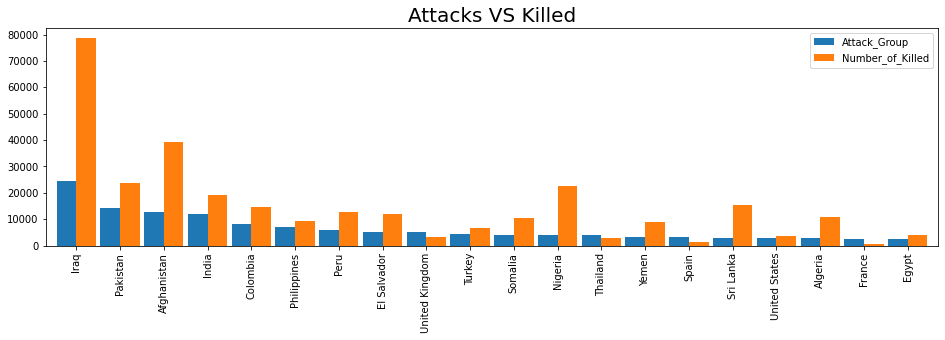

In [70]:
count_terror = data['Country_name'].value_counts()[:20].to_frame()
count_terror.columns=['Attack_Group']
count_kill=data.groupby ('Country_name')['Number_of_Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(16,4)
plt.show()

## Attack by group

In [71]:
data['Attack_Group'].value_counts()[:15]

Unknown                                             82457
Taliban                                              7469
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4532
Farabundo Marti National Liberation Front (FMLN)     3343
Al-Shabaab                                           3281
New People's Army (NPA)                              2752
Irish Republican Army (IRA)                          2658
Revolutionary Armed Forces of Colombia (FARC)        2465
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2306
Basque Fatherland and Freedom (ETA)                  2016
Communist Party of India - Maoist (CPI-Maoist)       1870
Maoists                                              1625
Liberation Tigers of Tamil Eelam (LTTE)              1600
Name: Attack_Group, dtype: int64

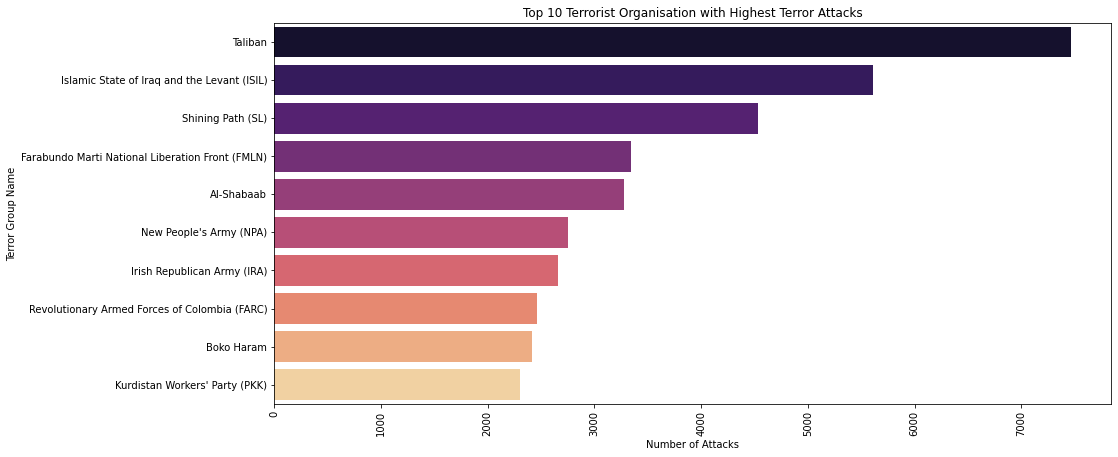

In [72]:
plt.figure(figsize = (15,7))
sns.barplot(x = data['Attack_Group'].value_counts()[1:11].values, y = data['Attack_Group'].value_counts()[1:11].index,palette='magma')
plt.title('Top 10 Terrorist Organisation with Highest Terror Attacks')
plt.ylabel('Terror Group Name')
plt.xlabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

In [88]:
data.columns

Index(['Year', 'Month', 'Day', 'Extended', 'country', 'Country_name', 'region',
       'Region_name', 'State', 'City', 'latitude', 'longitude', 'specificity',
       'vicinity', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'Success', 'Suicide', 'attacktype1', 'Attack_Type',
       'targtype1', 'Target_Type', 'targsubtype1', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1', 'natlty1_txt', 'Attack_Group', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1', 'Weapon',
       'weapsubtype1', 'Number_of_Killed', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property', 'ishostkid', 'News_source',
       'casualities'],
      dtype='object')

## Number of people kiled by group

In [91]:
group_killed= data[['Attack_Group','Number_of_Killed','Year','Country_name','Region_name']].groupby(['Attack_Group'],axis=0).sum().sort_values('Number_of_Killed', ascending=False)[1:20]
group_killed

Number_of_Killed      Year
Attack_Group                                                                
Islamic State of Iraq and the Levant (ISIL)                38923.0  11312282
Taliban                                                    29400.0  15036388
Boko Haram                                                 20328.0   4870296
Shining Path (SL)                                          11491.0   9007058
Liberation Tigers of Tamil Eelam (LTTE)                    10965.0   3195174
Al-Shabaab                                                  9323.0   6609131
Farabundo Marti National Liberation Front (FMLN)            8064.0   6639579
Nicaraguan Democratic Force (FDN)                           6662.0   1776249
Tehrik-i-Taliban Pakistan (TTP)                             6040.0   2702453
Revolutionary Armed Forces of Colombia (FARC)               5620.0   4927158
Kurdistan Workers' Party (PKK)                              4921.0   4621462
Al-Qaida in Iraq                                            4380.0   1280628
New People's Army (NPA)                                     4346.0   5516884
Hutu extremists                                             4095.0    329605
Al-Qaida                                                    3860.0    146242
Al-Qaida in the Arabian Peninsula (AQAP)                    3565.0   2053687
Lord's Resistance Army (LRA)                                3104.0    632323
Fulani extremists                                           3083.0   1029753
Houthi extremists (Ansar Allah)                             3050.0   2140339

In [92]:
fig = px.funnel(group_killed, x='Number_of_Killed', y=group_killed.index)
fig.show()

## Attack_Type in total

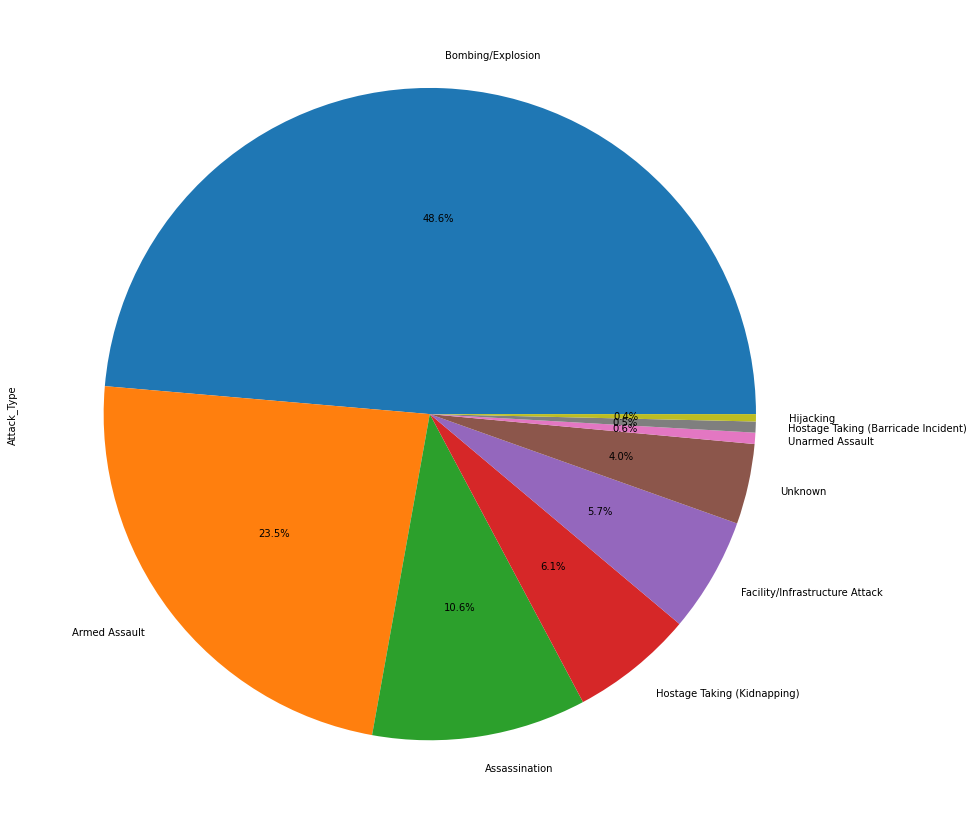

In [73]:
# Pie Plot of AttackTypes
plt.figure(figsize=(15,15))
data['Attack_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

## Top 20 Group attack





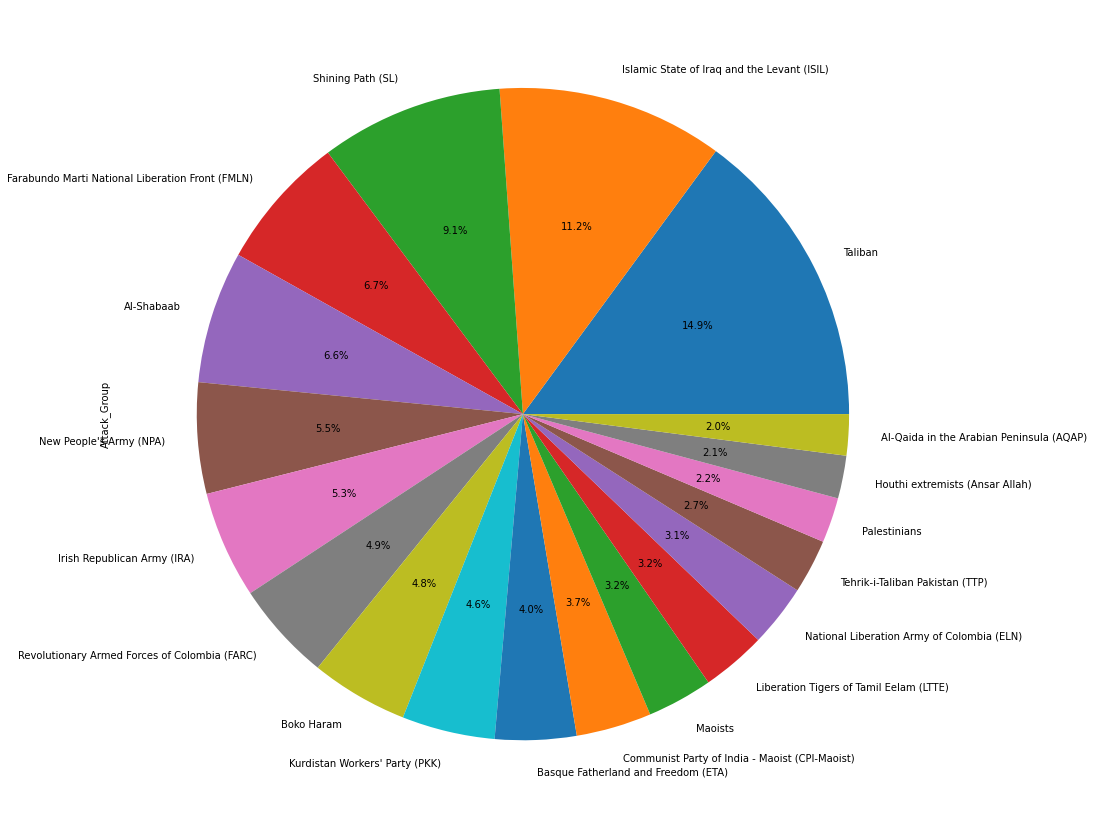

In [74]:
# Pie Plot of AttackTypes
plt.figure(figsize=(15,15))
data['Attack_Group'].value_counts()[:20].drop('Unknown').plot.pie(autopct="%1.1f%%")
plt.show()

# Total Number of people killed in terror attack

In [75]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Number_of_Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 410657


### 'Most used attack type

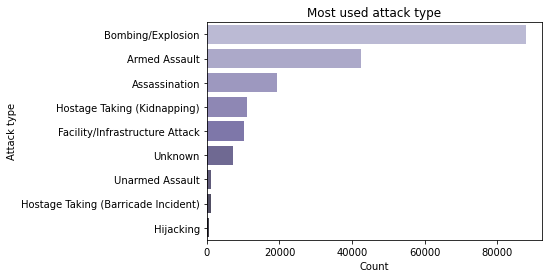

In [76]:
attack_type=data['Attack_Type'].value_counts().reset_index()
attack_type.rename(columns={"index":'Attack type','Attack_Type':'Count'},inplace=True)
ax = sns.barplot(x="Count", y="Attack type", data=attack_type,
                 palette="Purples_d").set_title('Most used attack type')

## Target types

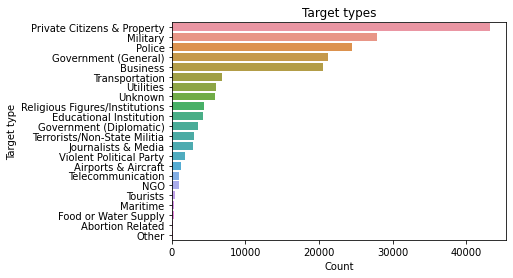

In [77]:
target_type=data['Target_Type'].value_counts().reset_index()
target_type.rename(columns={"index":'Target type','Target_Type':'Count'},inplace=True)
ax = sns.barplot(x="Count", y="Target type", data=target_type).set_title('Target types')

In [78]:
#Number of Killed in Terrorist Attacks by Countries
countryData = data.loc[:,'Country_name']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
attackData = data.loc[:,'Attack_Type']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

Attack_Type  Number_of_Killed
0                   Assassination               1.0
5                   Armed Assault               0.0
6                   Assassination               0.0
7               Bombing/Explosion               0.0
8  Facility/Infrastructure Attack               0.0

In [79]:
typeKillFormatData = typeKillData.pivot_table(columns='Attack_Type', values='Number_of_Killed', aggfunc='sum')
typeKillFormatData

Attack_Type       Armed Assault  Assassination  Bombing/Explosion  \
Number_of_Killed       159640.0        24776.0           157235.0   

Attack_Type       Facility/Infrastructure Attack  Hijacking  \
Number_of_Killed                          3640.0     3715.0   

Attack_Type       Hostage Taking (Barricade Incident)  \
Number_of_Killed                               4478.0   

Attack_Type       Hostage Taking (Kidnapping)  Unarmed Assault  Unknown  
Number_of_Killed                      24129.0            879.0  32165.0

## wapan used most

In [81]:
weapon_name=data['Weapon'].value_counts().reset_index()
weapon_name.rename(columns={"index":'Weapons','Weapon':'Count'},inplace=True)
weapon_name

Weapons  Count
0                                          Explosives  92099
1                                            Firearms  58347
2                                             Unknown  14890
3                                          Incendiary  11058
4                                               Melee   3624
5                                            Chemical    319
6                                  Sabotage Equipment    138
7   Vehicle (not to include vehicle-borne explosiv...    135
8                                               Other    110
9                                        Fake Weapons     33
10                                         Biological     33
11                                       Radiological     14

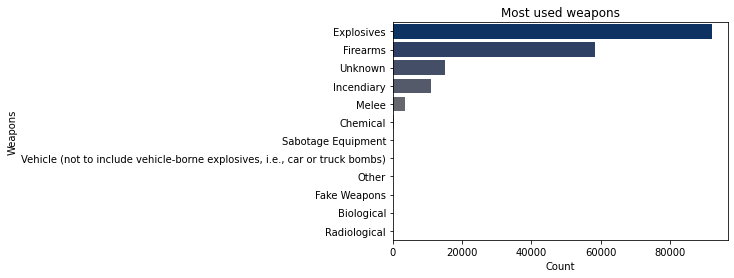

In [82]:
ax = sns.barplot(x="Count", y="Weapons", data=weapon_name,
                 palette="cividis").set_title('Most used weapons')

### Total Successful vs Unsuccessful Attacks

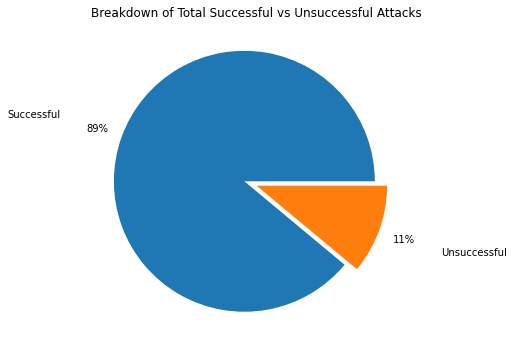

In [83]:
total_success_percent = data['Success'].sum() / len(data['Success'])
proportions = [total_success_percent, 1-total_success_percent]
labels = ['Successful', 'Unsuccessful']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize = (12,6))

a = ax.pie(proportions, labels=labels, autopct='%1.0f%%', explode=explode, pctdistance=1.2,labeldistance=1.5)
ax.set_title('Breakdown of Total Successful vs Unsuccessful Attacks');

### Total Suicide Attacks vs Other Attacks

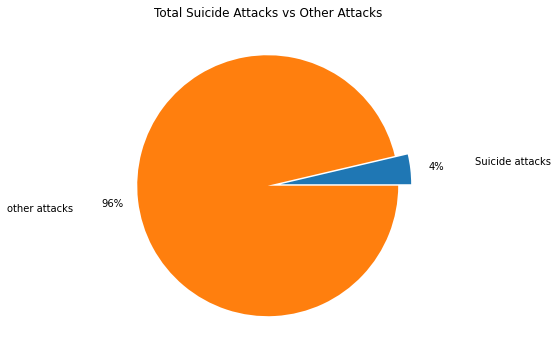

In [84]:
total_success_percent = data['Suicide'].sum() / len(data['Suicide'])
proportions = [total_success_percent, 1-total_success_percent]
labels = ['Suicide attacks', 'other attacks']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize = (12,6))

a = ax.pie(proportions, labels=labels, autopct='%1.0f%%', explode=explode, pctdistance=1.2,labeldistance=1.5)
ax.set_title('Total Suicide Attacks vs Other Attacks');

## Top 50 Worst Terrorist attacks

In [85]:
data['casualities'] = data['Number_of_Killed'] + data['nwound']
terror_data = data.sort_values(by='casualities',ascending=False)[:50]
terror_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Year  Month  Day  Extended  country   Country_name  region  \
73127   2001      9   11         0      217  United States       1   
73126   2001      9   11         0      217  United States       1   
58841   1995      3   20         0      101          Japan       4   
68071   1998      8    7         0      104          Kenya      11   
133518  2014      6   12         1       95           Iraq      10   
159773  2016      3    9         0       95           Iraq      10   
61548   1996      1   31         0      186      Sri Lanka       6   
55934   1994      4   13         0      168         Rwanda      11   
85682   2008      2    2         1       42           Chad      11   
76953   2004      9    1         1      167         Russia       9   
81098   2006      7   11         0       92          India       6   
84018   2007      8   14         0       95           Iraq      10   
84010   2007      8   14         0       95           Iraq      10   
136283  2014      8    3         1       95           Iraq      10   
179344  2017     10    1         0      217  United States       1   
179671  2017     10   14         0      182        Somalia      11   
59037   1995      4   19         0      217  United States       1   
54147   1992     11   21         0      202     Tajikistan       7   
17132   1982     10    1         0       94           Iran      10   
23314   1984      9   20         0      217  United States       1   
76347   2004      3   21         0      141          Nepal       6   
78941   2005      9   14         0       95           Iraq      10   
130420  2014      4   15         0     1004    South Sudan      11   
59038   1995      4   19         0      101          Japan       4   
133225  2014      6   10         0       95           Iraq      10   
93271   2009      8   19         0       95           Iraq      10   
163169  2016      6    1         1       95           Iraq      10   
175415  2017      5   31         0        4    Afghanistan       6   
164327  2016      7    3         0       95           Iraq      10   
153580  2015      9   28         1        4    Afghanistan       6   
76326   2004      3   11         0      185          Spain       8   
164724  2016      7   14         0       69         France       8   
136746  2014      8   19         1      200          Syria      10   
76330   2004      3   11         0      185          Spain       8   
56686   1994      6   27         0      101          Japan       4   
50927   1992      4    4         0       65       Ethiopia      11   
82739   2007      3   27         0       95           Iraq      10   
67334   1997     12   10         0      168         Rwanda      11   
76324   2004      3   11         0      185          Spain       8   
76327   2004      3   11         0      185          Spain       8   
81896   2006     11   23         0       95           Iraq      10   
31595   1987      7   18         0      137     Mozambique      11   
62943   1996      7   24         0      186      Sri Lanka       6   
66454   1997      8   28         0        6        Algeria      10   
123440  2013     11   15         0      113          Libya      10   
172117  2017      2   16         0      153       Pakistan       6   
180708  2017     11   24         0       60          Egypt      10   
94099   2009     10   25         0       95           Iraq      10   
94095   2009     10   25         0       95           Iraq      10   
170198  2016     12   10         1      200          Syria      10   

                       Region_name                            State  \
73127                North America                         New York   
73126                North America                         New York   
58841                    East Asia                            Tokyo   
68071           Sub-Saharan Africa                          Nairobi   
133518  Middle East & North Africa                          Saladin   
159773  Mid

### Pivot table 

In [86]:
# te = data.sort_values(by='casualities',ascending=False)[:50]
heat=data.pivot_table(index='Country_name',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year          1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  \
Country_name                                                               
Afghanistan    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  18.0   
Albania        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Algeria        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
Andorra        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Angola         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  13.0   

Year          1980  1981  1982        1983  1984  1985  1986  1987       1988  \
Country_name                                                                    
Afghanistan    0.0   0.0   0.0    0.000000   0.0   0.0   0.0   2.0  21.272727   
Albania        0.0   0.0   0.0    0.000000   0.0   0.0   0.0   0.0   0.000000   
Algeria        0.0   0.0   0.0    0.000000   0.0   0.0   0.0   0.0   0.000000   
Andorra        0.0   0.0   0.0    0.000000   0.0   0.0   0.0   0.0   0.000000   
Angola         0.0   3.0   1.0  100.166667  24.9   1.0  28.4   5.0  23.583333   

Year              1989      1990      1991      1992       1994      1995  \
Country_name                                                                
Afghanistan   9.400000  67.00000  6.500000  6.500000   5.777778  2.500000   
Albania       0.000000   0.00000  0.000000  0.333333   0.500000  0.000000   
Algeria       0.000000   2.00000  3.833333  2.372093   2.788546  7.994595   
Andorra       0.000000   0.00000  0.000000  0.000000   0.000000  0.000000   
Angola        8.166667   1.77561  9.600000  3.414634  20.333333  7.800000   

Year               1996       1997       1998       1999       2000  \
Country_name                                                          
Afghanistan   15.250000  41.000000  38.000000   8.888889   3.500000   
Albania        7.333333   2.512195   0.714286   3.666667   0.000000   
Algeria       12.767442  17.739003  12.593333   7.333333   5.925373   
Andorra        0.000000   0.000000   0.000000   0.000000   0.000000   
Angola         6.000000   9.428571  16.100000  17.588235  10.190476   

Year               2001       2002      2003      2004      2005      2006  \
Country_name                                                                 
Afghanistan   16.642857  10.027027  3.490000  6.113636  5.019355  5.903571   
Albania        0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
Algeria        7.554545   7.083333  5.318841  5.268657  4.384615  2.847682   
Andorra        0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
Angola        33.666667  12.666667  0.000000  0.000000  0.000000  0.000000   

Year              2007      2008      2009      2010      2011      2012  \
Country_name                                                               
Afghanistan   6.911504  5.866828  5.325349  5.273063  8.324519  5.569775   
Albania       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Algeria       7.617886  5.466667  3.778846  3.115789  3.933333  3.292683   
Andorra       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Angola        0.000000  0.000000  2.000000  5.500000  0.000000  0.000000   

Year              2013      2014      2015      2016       2017  
Country_name                                                     
Afghanistan   5.565489  5.770285  6.848029  7.808905   8.570721  
Albania       0.000000  1.500000  0.000000  0.000000   0.000000  
Algeria       6.772727  5.153846  2.500000  1.222222   2.214286  
Andorra       0.000000  0.000000  0.000000  0.000000   0.000000  
Angola        0.000000  0.000000  0.000000  0.000000  69.666667

Conclusion


Iraq ranked first on global terrorist activity followed by Pakistan, Afghanistan then India and so on.

Most Targeted Areas are Private Citizens&Property, Military,Police and so on.
Global Terror attack rise sharply from 2011 and Maximum Attacks are in 2014 and Maximum people where died in 2014.
Taliban and ISIL are the most active terrorist Groups.